<a href="https://colab.research.google.com/github/LIDONI/Analyse_donnees_projet_scoring_de_march-s-/blob/main/Prediction_salaires_streamlit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Prédiction de salaire**

In [ ]:
import pandas as pd
data = pd.  read_csv('/content/drive/MyDrive/ Projet: DA, ML, et Deploiement/employee_attrition_data.csv')
data.head()

,Employee_ID,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee_ID            1000 non-null   int64  
 1   Age                    1000 non-null   int64  
 2   Gender                 1000 non-null   object 
 3   Department             1000 non-null   object 
 4   Job_Title              1000 non-null   object 
 5   Years_at_Company       1000 non-null   int64  
 6   Satisfaction_Level     1000 non-null   float64
 7   Average_Monthly_Hours  1000 non-null   int64  
 8   Promotion_Last_5Years  1000 non-null   int64  
 9   Salary                 1000 non-null   int64  
 10  Attrition              1000 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 86.1+ KB


In [ ]:
# Valeur manquantes
data.isna().sum()

,0
Employee_ID,0
Age,0
Gender,0
Department,0
Job_Title,0
Years_at_Company,0
Satisfaction_Level,0
Average_Monthly_Hours,0
Promotion_Last_5Years,0
Salary,0


In [ ]:
# Vérification des colonnes
data.columns

Index(['Employee_ID', 'Age', 'Gender', 'Department', 'Job_Title',
       'Years_at_Company', 'Satisfaction_Level', 'Average_Monthly_Hours',
       'Promotion_Last_5Years', 'Salary', 'Attrition'],
      dtype='object')

In [ ]:
#Vérification de doublons
data.duplicated().sum()

0

In [ ]:
data.drop(columns="Employee_ID",inplace=True)
data.columns

Index(['Age', 'Gender', 'Department', 'Job_Title', 'Years_at_Company',
       'Satisfaction_Level', 'Average_Monthly_Hours', 'Promotion_Last_5Years',
       'Salary', 'Attrition'],
      dtype='object')

In [ ]:
# Voir la composition par sexe de nos données

data['Gender'].value_counts()

,count
Gender,
Male,506
Female,494


<Axes: ylabel='count'>

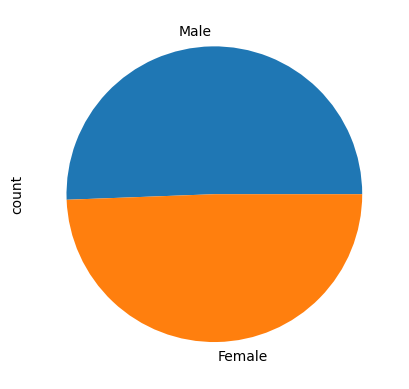

In [ ]:
data['Gender'].value_counts().plot(kind="pie")

In [ ]:
#Grouper les types de travail par salaire
data.groupby("Job_Title")["Salary"].mean().sort_values(ascending=False)

,Salary
Job_Title,
Analyst,66009.384615
Manager,65452.529126
Engineer,64440.163551
Accountant,64330.412621
HR Specialist,62724.407821


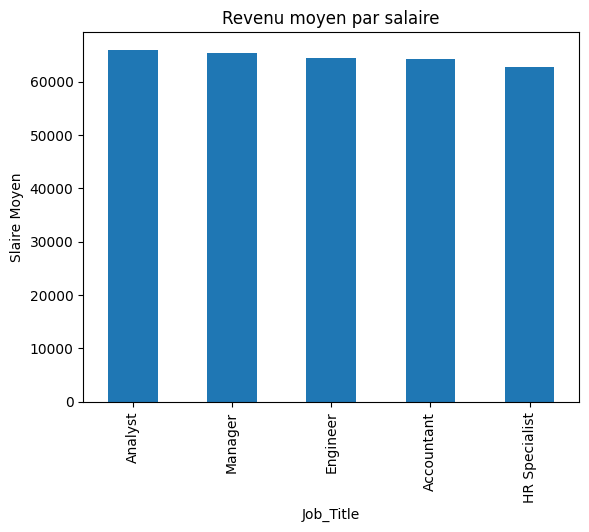

In [ ]:
import matplotlib.pyplot as plt
data.groupby("Job_Title")["Salary"].mean().sort_values(ascending=False).plot(kind="bar")
plt.title("Revenu moyen par salaire")
plt.ylabel("Slaire Moyen")
plt.show()

In [ ]:
data.groupby(["Department","Promotion_Last_5Years"])["Salary"].mean()

Department   Promotion_Last_5Years
Engineering  0                        65541.063636
             1                        62424.127660
Finance      0                        63390.145299
             1                        62041.269663
HR           0                        63012.556701
             1                        65882.861702
Marketing    0                        65251.597826
             1                        66018.632653
Sales        0                        64295.846939
             1                        67838.756757
Name: Salary, dtype: float64

In [ ]:
data.describe()

,Age,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,42.205000,5.605000,0.505995,199.493000,0.486000,64624.980000,0.495000
std,10.016452,2.822223,0.289797,29.631908,0.500054,20262.984333,0.500225
min,25.000000,1.000000,0.001376,150.000000,0.000000,30099.000000,0.000000
25%,33.000000,3.000000,0.258866,173.000000,0.000000,47613.500000,0.000000
50%,43.000000,6.000000,0.505675,201.000000,0.000000,64525.000000,0.000000
75%,51.000000,8.000000,0.761135,225.000000,1.000000,81921.000000,1.000000
max,59.000000,10.000000,0.999979,249.000000,1.000000,99991.000000,1.000000


In [ ]:
data["Salary"].describe()

,Salary
count,1000.000000
mean,64624.980000
std,20262.984333
min,30099.000000
25%,47613.500000
50%,64525.000000
75%,81921.000000
max,99991.000000


##**Prédiction**

In [ ]:
data.head()

,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0


In [ ]:
# Split de données
y = data[["Salary"]]
X = data[["Years_at_Company","Satisfaction_Level","Average_Monthly_Hours"]]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

In [ ]:
# Normaliser ou standardiser les données avec standardscaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

Le code que vous avez partagé utilise la bibliothèque joblib pour enregistrer un objet Python, en l'occurrence scaler, dans un fichier. Plus précisément :

import joblib : Cette ligne importe la bibliothèque joblib, qui est couramment utilisée pour la sérialisation (enregistrement) et la désérialisation (chargement) d'objets Python. Elle est particulièrement utile pour les objets de machine learning (comme les modèles d'apprentissage automatique) car elle est optimisée pour gérer des objets volumineux et complexes.

joblib.dump(scaler, "scaler.pkl") : Cette ligne sauvegarde l'objet scaler dans un fichier nommé scaler.pkl dans le répertoire courant. Le fichier scaler.pkl contiendra une version sérialisée de l'objet scaler, qui est généralement un objet qui transforme ou normalise des données, comme un StandardScaler ou un autre type de préprocesseur de données.

Le fichier .pkl est un fichier binaire qui permet de sauvegarder l'état actuel de l'objet scaler, de sorte que vous puissiez le charger plus tard sans avoir à le réentraîner ou le recalculer.

In [ ]:
import joblib
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [ ]:
X_test = scaler.fit_transform(X_test)

Explication des résultats :
MAE (Mean Absolute Error) : Cette mesure donne l'écart moyen absolu entre les valeurs réelles et les prévisions. Plus cette valeur est faible, meilleur est le modèle.
RMSE (Root Mean Squared Error) : Cette mesure calcule l'écart quadratique moyen, et est particulièrement sensible aux grandes erreurs. Comme le MSE, une valeur plus faible indique un meilleur modèle.

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error , mean_squared_error

def results(predictions):
  print("mean absolute error is {}".format(mean_absolute_error(y_test, predictions)))
  print("mean square error is {}".format(np.sqrt(mean_squared_error(y_test, predictions))))

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
Predictionlr = lr.predict(X_test)  #  C'est notre y_test

In [ ]:
results(Predictionlr)

mean absolute error is 18258.030269802053
mean square error is 20899.20504059279


**Optimisation des hyperparamètres :** GridSearchCV est un outil de la bibliothèque scikit-learn utilisé pour l'ajustement des hyperparamètres dans l'apprentissage automatique.GridSearchCV est un outil de la bibliothèque scikit-learn utilisé pour l'ajustement des hyperparamètres dans l'apprentissage automatique.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [ ]:
svrmodel = SVR()

In [ ]:
param_gridsvr = {"C" : [0.01,0.1,0.5], "degree": [2,3,4], "kernel" :["linear","rbf","poly"]}

In [ ]:
gridsvr = GridSearchCV(svrmodel,param_gridsvr)

In [ ]:
gridsvr.fit(X_train,y_train.values.ravel())

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.5], 'degree': [2, 3, 4],
                         'kernel': ['linear', 'rbf', 'poly']})

In [ ]:
gridsvr.best_params_

{'C': 0.5, 'degree': 2, 'kernel': 'linear'}

In [ ]:
predictionssvr = gridsvr.predict(X_test)

In [ ]:
results(predictionssvr)

mean absolute error is 18426.21636432882
mean square error is 21031.174139839048


**Comparaison :**

Le modèle de régression linéaire est légèrement plus performant que le modèle SVR en termes de MAE et de MSE.

Un MAE plus faible indique qu'en moyenne, le modèle de régression linéaire commet moins d'erreurs que le modèle SVR.
Une EQM plus faible confirme ce fait, suggérant que le modèle de régression linéaire présente moins d'écarts importants dans ses prédictions.
Toutefois, la différence entre les deux modèles est minime. Cela suggère que les deux modèles ont des performances similaires sur les données d'essai données.

**Suggestions :**

Poursuivre l'analyse : Vous pourriez étudier d'autres mesures d'évaluation telles que le R² (coefficient de détermination) ou comparer les graphes résiduels pour mieux comprendre le comportement du modèle.
Amélioration : Envisagez l'ingénierie des caractéristiques, l'ajustement des hyperparamètres ou l'expérimentation d'autres modèles tels que Random Forest ou Gradient Boosting pour améliorer les performances prédictives.

**Essayons un troisième type de modèle : RandomForestRegrssor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor()

In [ ]:
param_gridrfr = {"n_estimators": [2,3,4,5,6],"max_depth": [5,10,15]}

In [ ]:
gridrfr = GridSearchCV(rfrmodel, param_gridrfr)

In [ ]:
gridrfr.fit(X_train,y_train.values.ravel())

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [2, 3, 4, 5, 6]})

In [ ]:
gridrfr.best_params_

{'max_depth': 5, 'n_estimators': 6}

In [ ]:
predictionsofrfr = gridrfr.predict(X_test)

In [ ]:
results(predictionsofrfr)

mean absolute error is 18454.635274647288
mean square error is 21261.343861316145


**Ce model n'améliore pas la performance alors continuons avec lr**

In [ ]:
lr

LinearRegression()

In [ ]:
#Exporter le model de lr comme pkl
joblib.dump(lr,"model.pkl")

['model.pkl']

**Constructiond de l'appli streamlit**

In [ ]:
!pip install streamlit pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.8 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import joblib
import numpy as np

st.title("Salary Estimation App")

st.divider()

# Input Fields
years_at_company = st.number_input("Enter years at company", min_value=0, max_value=20)
satisfaction_level = st.number_input("Satisfaction Level", min_value=0.0, max_value=1.0)
average_monthly_hours = st.number_input("Average Monthly Hours", min_value=120, max_value=400)

x = [years_at_company, satisfaction_level, average_monthly_hours]

scaler = joblib.load("scaler.pkl")
model = joblib.load("model.pkl")

predict_button = st.button("Press for predicting the salary")

st.divider()

if predict_button:
    X1 = np.array(x)
    X_array = scaler.transform([X1])
    prediction = model.predict(X_array)
    st.write(f"Salary prediction is {prediction[0]}")

else:
    st.write("Please enter the values and press the predict button")


Writing app.py


In [ ]:
!npm install -g localtunnel
!ngrok config add-authtoken 2kMwt6hFoKOP9pQ3dQTPKJdBy7u_7vBy3HSfta6xhpboZNJc
#!ngrok http 8501
# Fermer tous les tunnels existants
ngrok.kill()  # Correctement utilisé avec des parenthèse

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼
added 22 packages in 4s
⠼
⠼3 packages are looking for funding
⠼  run `npm fund` for details
Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


NameError: name 'ngrok' is not defined

In [ ]:
app_code = """
import streamlit as st
import joblib
import numpy as np

st.title("Salary Estimation App")

st.divider()

# Input Fields
years_at_company = st.number_input("Enter years at company", min_value=0, max_value=20)
satisfaction_level = st.number_input("Satisfaction Level", min_value=0.0, max_value=1.0)
average_monthly_hours = st.number_input("Average Monthly Hours", min_value=120, max_value=400)

x = [years_at_company, satisfaction_level, average_monthly_hours]

scaler = joblib.load("scaler.pkl")
model = joblib.load("model.pkl")

predict_button = st.button("Press for predicting the salary")

st.divider()

if predict_button:
    X1 = np.array(x)
    X_array = scaler.transform([X1])
    prediction = model.predict(X_array)
    st.write(f"Salary prediction is {prediction[0]}")

else:
    st.write("Please enter the values and press the predict button")

"""
with open('/content/app.py', 'w') as f:
    f.write(app_code)

In [ ]:
from pyngrok import ngrok
import subprocess
import time

# Configuration de ngrok
ngrok.set_auth_token("2kMwt6hFoKOP9pQ3dQTPKJdBy7u_7vBy3HSfta6xhpboZNJc")

# Fonction pour obtenir ou créer un tunnel
def get_or_create_tunnel():
    tunnels = ngrok.get_tunnels()
    if tunnels:
        return tunnels[0].public_url
    else:
        return ngrok.connect(8501)

# Fermer tous les tunnels existants
ngrok.kill()

# Lancer Streamlit en arrière-plan
subprocess.Popen(["streamlit", "run", "/content/app.py"])

# Attendre que Streamlit démarre
time.sleep(5)

# Obtenir ou créer un tunnel ngrok
try:
    public_url = get_or_create_tunnel()
    print(f"Streamlit app running at: {public_url}")
except Exception as e:
    print(f"Error creating ngrok tunnel: {str(e)}")
    print("Please check your ngrok dashboard and close any active sessions.")

Streamlit app running at: NgrokTunnel: "https://c974-35-229-40-32.ngrok-free.app" -> "http://localhost:8501"
